In [1]:
import pandas as pd
#Data manipulation
import numpy as np
#array
import sklearn.linear_model as linear
from sklearn.model_selection import train_test_split, cross_val_score
# most important data science library
import matplotlib.pyplot as plt
#for graphs
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error


Read data

In [2]:
salaryData=pd.read_excel("salaries_clean.xlsx")

In [3]:
salaryData.describe()

,index,salary_id,location_latitude,location_longitude,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,new_comments
count,1655.000000,1655.000000,792.000000,792.000000,1608.000000,1608.000000,1.651000e+03,1.332000e+03,1.336000e+03,269.000000
mean,827.000000,1684.100906,37.754394,-64.712273,6.756113,2.656163,6.224326e+06,2.253313e+04,1.184656e+04,0.111524
std,477.901664,932.901390,16.740905,67.090364,5.687004,3.301834,2.461078e+08,3.098035e+05,6.921398e+04,0.769411
min,0.000000,1.000000,-41.000000,-123.270000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000
25%,413.500000,897.000000,37.410000,-102.702500,3.000000,1.000000,6.253400e+04,0.000000e+00,0.000000e+00,0.000000
50%,827.000000,1711.000000,38.580000,-95.000000,5.000000,2.000000,1.000000e+05,0.000000e+00,5.000000e+02,0.000000
75%,1240.500000,2477.000000,45.440000,-64.562500,10.000000,3.000000,1.300000e+05,5.000000e+03,1.000000e+04,1.000000
max,1654.000000,3298.000000,65.000000,174.000000,56.000000,58.000000,1.000000e+10,8.999999e+06,2.000000e+06,1.000000


In [4]:
salaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1655 non-null   int64  
 1   salary_id                  1655 non-null   int64  
 2   employer_name              1651 non-null   object 
 3   Ticker                     564 non-null    object 
 4   location_name              1653 non-null   object 
 5   location_city              1386 non-null   object 
 6   location_state             1176 non-null   object 
 7   location_country           1582 non-null   object 
 8   location_latitude          792 non-null    float64
 9   location_longitude         792 non-null    float64
 10  job_title                  1655 non-null   object 
 11  job_title_category         1655 non-null   object 
 12  job_title_rank             425 non-null    object 
 13  total_experience_years     1608 non-null   float

Remove all invalid entries from the dataset

In [5]:
salaryData=salaryData[salaryData['delete?']!='x']
newData = salaryData
salaryData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1616 entries, 1 to 1654
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1616 non-null   int64  
 1   salary_id                  1616 non-null   int64  
 2   employer_name              1612 non-null   object 
 3   Ticker                     560 non-null    object 
 4   location_name              1614 non-null   object 
 5   location_city              1370 non-null   object 
 6   location_state             1163 non-null   object 
 7   location_country           1563 non-null   object 
 8   location_latitude          783 non-null    float64
 9   location_longitude         783 non-null    float64
 10  job_title                  1616 non-null   object 
 11  job_title_category         1616 non-null   object 
 12  job_title_rank             422 non-null    object 
 13  total_experience_years     1573 non-null   float

Descriptive analysis (compare the means)

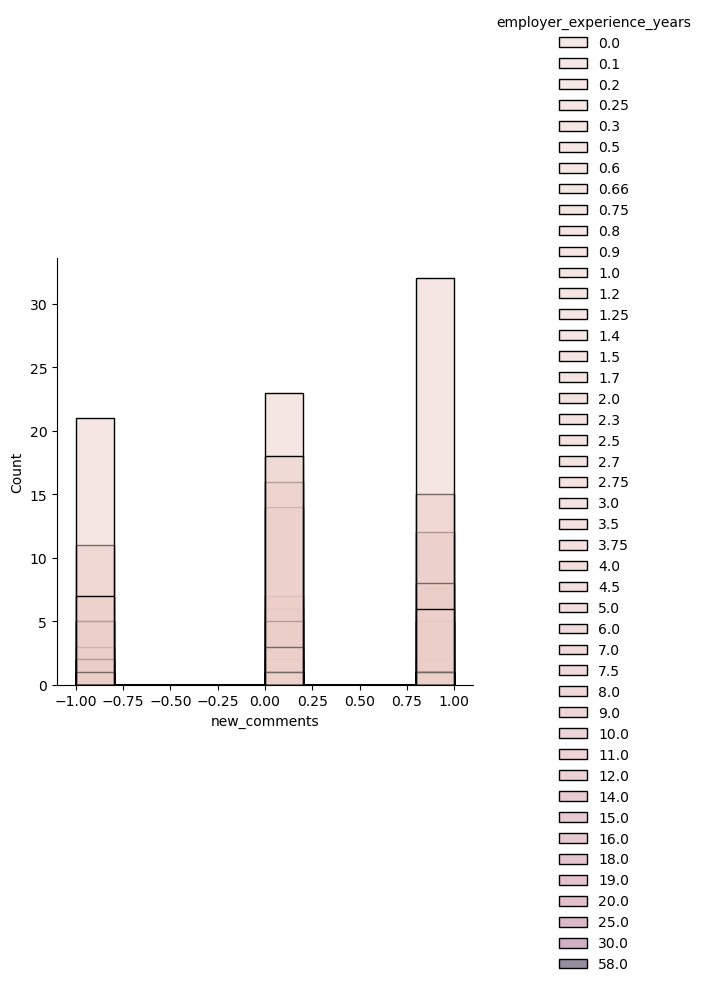

In [6]:
sns.displot(salaryData,x="new_comments",hue="employer_experience_years")

Get the mean experienced years based on whether the comment was positive (1), neutral (0), or negative (-1).

In [7]:
salaryData.groupby(['new_comments'])['employer_experience_years'].mean()

new_comments
-1.0    2.570000
 0.0    2.089320
 1.0    2.312872
Name: employer_experience_years, dtype: float64

In [8]:
salaryData.loc[salaryData["new_comments"]==0]["employer_experience_years"].mean()

2.0893203883495146

In [9]:
salaryData.loc[salaryData["new_comments"]==1]["employer_experience_years"].mean()

2.312872340425532

T-test for comparing the means

In [10]:
import scipy.stats as stats

In [11]:
stats.ttest_ind(a=salaryData.loc[salaryData["new_comments"]==0]["employer_experience_years"], b=salaryData.loc[salaryData["new_comments"]==1]["employer_experience_years"])

Ttest_indResult(statistic=nan, pvalue=nan)

Descriptive analysis with regression

Model with online

In [12]:
reg1=linear.LinearRegression()
newdataset = salaryData
salaryData = salaryData[salaryData["new_comments"].notna()]
salaryData = salaryData[salaryData["employer_experience_years"].notna()]
reg1.fit(salaryData["new_comments"].values.reshape(-1,1),salaryData["employer_experience_years"].values.reshape(-1,1))
salaryData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 3 to 1651
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      262 non-null    int64  
 1   salary_id                  262 non-null    int64  
 2   employer_name              261 non-null    object 
 3   Ticker                     87 non-null     object 
 4   location_name              261 non-null    object 
 5   location_city              223 non-null    object 
 6   location_state             186 non-null    object 
 7   location_country           255 non-null    object 
 8   location_latitude          146 non-null    float64
 9   location_longitude         146 non-null    float64
 10  job_title                  262 non-null    object 
 11  job_title_category         262 non-null    object 
 12  job_title_rank             66 non-null     object 
 13  total_experience_years     260 non-null    float6

In [13]:
reg1.score(salaryData["new_comments"].values.reshape(-1,1),salaryData["employer_experience_years"].values.reshape(-1,1))

0.0011584733785875434

Note that SKlearn does not provide p values for the variables we should use another package

In [14]:
import statsmodels.api as sm

In [15]:

model=sm.OLS(salaryData["new_comments"].values.reshape(-1,1),sm.add_constant(salaryData["employer_experience_years"].values.reshape(-1,1)))
model2=model.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3016
Date:                Mon, 10 Apr 2023   Prob (F-statistic):              0.583
Time:                        17:42:46   Log-Likelihood:                -303.51
No. Observations:                 262   AIC:                             611.0
Df Residuals:                     260   BIC:                             618.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1365      0.067      2.037      0.0

model with all the other variables

We had an error because of missing data

Dealing with missing data (remove n/a)

In [16]:
salaryData['Profit'] = salaryData['Profit'].apply(pd.to_numeric, errors='coerce').dropna()
salaryData['stock_value_bonus'] = salaryData['stock_value_bonus'].apply(pd.to_numeric, errors='coerce').dropna()
#newdataset=newdataset.dropna(subset=["employer_name", "total_experience_years","employer_experience_years","new_comments",'Profit'])
salaryData['Profit'] = salaryData['Profit'].apply(pd.to_numeric, errors='coerce').dropna()
salaryData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 3 to 1651
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      262 non-null    int64  
 1   salary_id                  262 non-null    int64  
 2   employer_name              261 non-null    object 
 3   Ticker                     87 non-null     object 
 4   location_name              261 non-null    object 
 5   location_city              223 non-null    object 
 6   location_state             186 non-null    object 
 7   location_country           255 non-null    object 
 8   location_latitude          146 non-null    float64
 9   location_longitude         146 non-null    float64
 10  job_title                  262 non-null    object 
 11  job_title_category         262 non-null    object 
 12  job_title_rank             66 non-null     object 
 13  total_experience_years     260 non-null    float6

In [17]:
salaryData = salaryData.dropna(subset=["annual_base_pay","annual_bonus","signing_bonus", "stock_value_bonus", "Profit"])
x=salaryData[["total_experience_years","employer_experience_years","new_comments"]].values
y=salaryData["Profit"].values
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)
reg2=linear.LinearRegression()
reg2.fit(x_train,y_train)
#print(reg2.score(x_train,y_train))
cv_score=cross_val_score(reg2, x_train, y_train, cv=10, scoring='r2')
#print('base model', np.mean(cv_score))
# Make predictions on training data
y_pred_train = reg2.predict(x_train)

# Calculate training error
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = reg2.score(x_train, y_train)
print('Training error:')
print('MSE:', mse_train)
print('RMSE:', rmse_train)
#print('R-squared:', -np.mean(cv_score))
#print('R-squared:', reg2.score(x_train,y_train))

Training error:
MSE: 9.0751134308442e+20
RMSE: 30124928930.777912


Ordinary least square regression results of the model

In [18]:
model=sm.OLS(y_train,x_train)
model2=model.fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.441
Model:                            OLS   Adj. R-squared (uncentered):              0.403
Method:                 Least Squares   F-statistic:                              11.57
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                    1.02e-05
Time:                        17:42:46   Log-Likelihood:                         -1212.4
No. Observations:                  47   AIC:                                      2431.
Df Residuals:                      44   BIC:                                      2436.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Create a graph to compare the predicted vs true target values of Model A

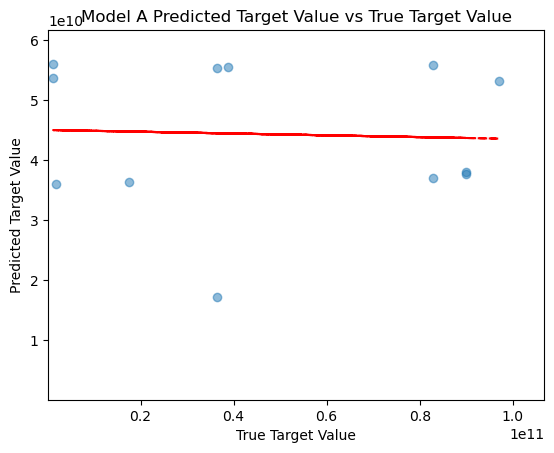

In [19]:
y_pred = reg2.predict(x_test)
min_value = min(np.min(y_test), np.min(y_pred)) * .1
max_value = max(np.max(y_test), np.max(y_pred)) * 1.1
max_value_x = np.max(y_test) * 1.1
max_value_y = np.max(y_pred) * 1.1
slope, intercept = np.polyfit(y_test, y_pred, 1) 
line = slope * np.array(y_test) + intercept
plt.scatter(y_test, y_pred, alpha=0.5, label=None) 
plt.plot(y_test, line, color='red', linestyle='--') 
plt.xlabel("True Target Value") 
plt.ylabel("Predicted Target Value") 
plt.xlim([min_value, max_value_x]) 
plt.ylim([min_value, max_value_y]) 
plt.title("Model A Predicted Target Value vs True Target Value") 
plt.show()

Quantitative

In [20]:
newdataset['Profit'] = newdataset['Profit'].apply(pd.to_numeric, errors='coerce')
newdataset['stock_value_bonus'] = newdataset['stock_value_bonus'].apply(pd.to_numeric, errors='coerce')
newdataset['annual_base_pay'] = newdataset['annual_base_pay'].apply(pd.to_numeric, errors='coerce')
newdataset['annual_bonus'] = newdataset['annual_bonus'].apply(pd.to_numeric, errors='coerce')
newdataset['signing_bonus'] = newdataset['signing_bonus'].apply(pd.to_numeric, errors='coerce')
newdataset["annual_base_pay"].fillna(newdataset["annual_base_pay"].mean())
newdataset["annual_bonus"].fillna(newdataset["annual_bonus"].mean())
newdataset["signing_bonus"].fillna(newdataset["signing_bonus"].mean())
newdataset["stock_value_bonus"].fillna(newdataset["stock_value_bonus"].mean())
newdataset = newdataset.dropna(subset=["annual_base_pay","annual_bonus","signing_bonus", "stock_value_bonus", "Profit"])
newdataset["Profit"].fillna(newdataset["Profit"].mean())
newdataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 60 to 1648
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      340 non-null    int64  
 1   salary_id                  340 non-null    int64  
 2   employer_name              340 non-null    object 
 3   Ticker                     340 non-null    object 
 4   location_name              339 non-null    object 
 5   location_city              304 non-null    object 
 6   location_state             294 non-null    object 
 7   location_country           334 non-null    object 
 8   location_latitude          142 non-null    float64
 9   location_longitude         142 non-null    float64
 10  job_title                  340 non-null    object 
 11  job_title_category         340 non-null    object 
 12  job_title_rank             114 non-null    object 
 13  total_experience_years     336 non-null    float

In [21]:
x=newdataset[["annual_base_pay","annual_bonus","signing_bonus", "stock_value_bonus"]].values
y=newdataset["Profit"].values
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)
reg3=linear.LinearRegression()
reg3.fit(x_train,y_train)
#print(reg3.score(x_train,y_train))
cv_score=cross_val_score(reg3, x_train, y_train, cv=10, scoring='r2')

# Make predictions on training data
y_pred_train = reg3.predict(x_train)

# Calculate training error
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = reg3.score(x_train, y_train)
print('Training error:')
print('MSE:', mse_train)
print('RMSE:', rmse_train)
#print('R Squared', -cv_score.mean())
#print('R-squared:', r2_train)

Training error:
MSE: 1.0809389646234275e+23
RMSE: 328776362383.82886


In [22]:
model=sm.OLS(y_train,x_train)
model2=model.fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.026
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              1.798
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                       0.129
Time:                        17:42:46   Log-Likelihood:                         -7600.5
No. Observations:                 272   AIC:                                  1.521e+04
Df Residuals:                     268   BIC:                                  1.522e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Create a graph to compare the Predicted vs True target values for Model B.

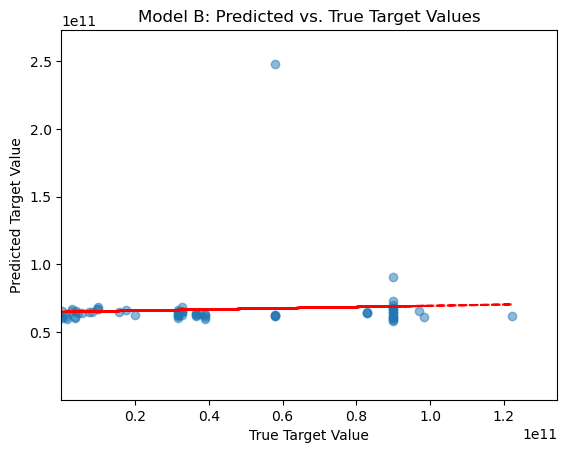

In [23]:
y_pred = reg3.predict(x_test)
min_value = min(np.min(y_test), np.min(y_pred)) * .1
max_value = max(np.max(y_test), np.max(y_pred)) * 1.1
max_value_x = np.max(y_test) * 1.1
max_value_y = np.max(y_pred) * 1.1
slope, intercept = np.polyfit(y_test, y_pred, 1) 
line = slope * np.array(y_test) + intercept
plt.scatter(y_test, y_pred, alpha=0.5, label=None) 
plt.plot(y_test, line, color='red', linestyle='--') 
plt.xlabel("True Target Value") 
plt.ylabel("Predicted Target Value") 
plt.xlim([min_value, max_value_x]) 
plt.ylim([min_value, max_value_y]) 
plt.title("Model B: Predicted vs. True Target Values") 
plt.show()